# Analiza podatkov animirinah serij

V tej projektni nalogi bomo pogledali podatke o japonskih animiranih serijah na spletni strani myanimelist.net, kjer lahko uporabniki označijo katere serije so pogledal in jim dajo oceno. Animirane serije oziroma animeji znajo biti relativno kontroverzni in zato bomo poskusili najti serijo, ki bo vsem všeč. Gledamo zadnjih 20 let serij, saj vsi vemo da so stare stvari dolgočasne, da najdemo perfektno serijo bomo poiskali dolžino, žanre in studio, ki so dokazano najbolj uspešni. Sproti si pa lahko še pogledatmo trende animiranih serij zadnjih 20 let. Pobrani podatki za vsako serijo so (kjer so bili na voljo):
- naslov
- studio
- dolžina (število epizod)
- vir
- žanri
- ocena
- število ljudi, ki so serijo gledali

Za delo najprej priipravimo podatke.


In [2705]:
import pandas as pd

pd.options.display.max_rows = 32

serije = pd.read_csv('Podatki/serije.csv', index_col='id')
serije['stevilo'] = serije['stevilo'].apply(lambda x: int(x.replace(",","")))
serije['dolzina'] = serije['dolzina'].apply(lambda x: int(x.replace("?","0")))
studii = pd.read_csv('Podatki/studii.csv', index_col='id')

serije

,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena
id,,,,,,,,
369,Boogiepop wa Warawanai,Madhouse,"5,8,14,7,37,40",12,Light novel,TV,107137,7.16
888,Megami Kouhosei,Xebec,"1,24,18,38,29",12,Manga,TV,20200,6.38
351,Ojamajo Doremi Sharp,Toei Animation,"4,25",49,Original,TV,17722,7.37
606,Kazemakase Tsukikage Ran,Madhouse,"2,4,13,17,21",13,Original,TV,14355,7.12
1137,Mushrambo,Toei Animation,"2,8,10,24,27",32,Original,TV,14138,6.96
...,...,...,...,...,...,...,...,...
48862,Cardfight!! Vanguard: overDress Season 2,GIFTanimation,"4,11",13,Original,TV,2936,6.12
49285,Waccha PriMagi!,Dongwoo A&amp;E,NaN,0,Original,TV,2435,6.29
49664,Kimi to Fit Boxing,Imagineer,30,12,Game,TV,814,NaN


In [3139]:
vsi_zanri = pd.read_csv('Podatki/zanri.csv', index_col='id')
seznam_zanrov = {1:'action', 2:'adventure', 3:'racing', 4:'comedy', 5:'avant garde', 6:'mythology', 7:'mystery', 8:'drama', 10:'fantasy', 11:'strategy game', 13:'historical', 14:'horror', 15:'kids', 17:'martial arts', 18:'mecha', 19:'music', 20:'parody', 21:'samurai', 22:'romance', 23:'school', 24:'sci-fi', 25:'shoujo', 26:'girls\' love', 27:'shounen', 28:'boys\' love', 29:'space', 30:'sports', 31:'super power', 32:'vampire', 36:'slice of life', 37:'supernatural', 38:'military', 39:'detective', 40:'psychological', 41:'suspense', 42:'seinen', 43:'josei', 46:'award winning', 47:'gourmet'}
izbrani_zanri = vsi_zanri[(vsi_zanri.zanr != 9) & (vsi_zanri.zanr != 12) & (vsi_zanri.zanr != 35)]
zanri = izbrani_zanri['zanr'].replace(seznam_zanrov)

---

# Analiza podatkov

Analizirali bomo kako sta število gledalcev in povprečna ocena odvisni od virov, žanrov, dolžine in studijev. Tako bomo ugotovili kakšne serije gledalci najbolj cenijo in kakšne so najbolj gledane. Za začetek si poglejmo kako so ocene odvisne od popularnosti.

<AxesSubplot:xlabel='stevilo', ylabel='ocena'>

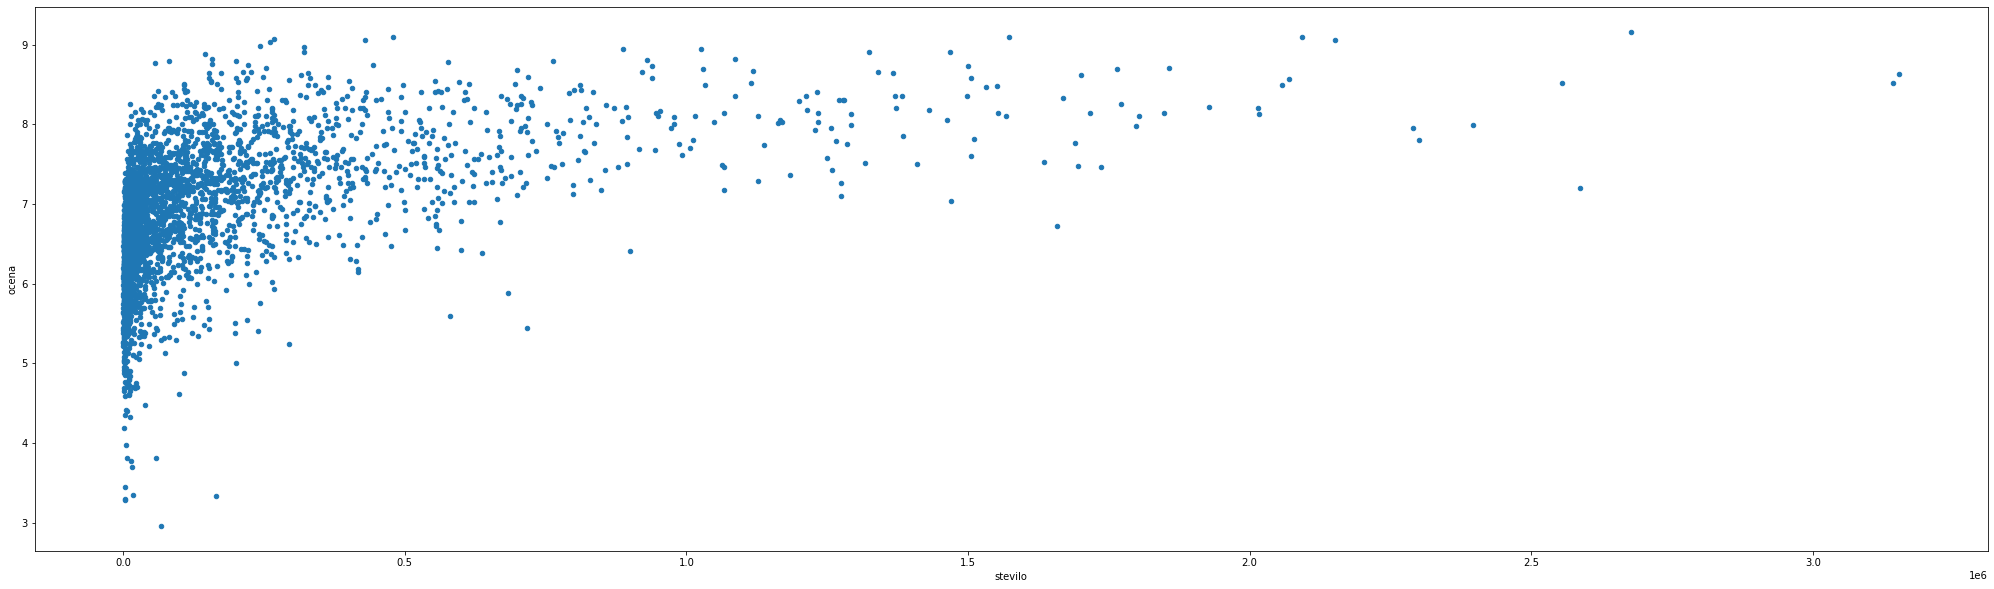

In [3140]:
serije.plot.scatter('stevilo', 'ocena', figsize=(35,10))

Prva stvar, ki jo opazimo je, da večina serij nima veliko gledalcev. Na splošno so bolj gledane serije manj pogosto nizko ocenjene in imajo višje povprečje, kar je po pričakovanjih, saj imamo podatke o številu ljudi, ki so serije do konca pogledali. Za bolj natančno sliko si bomo zdaj pogledali serije po tem po čem so prirejene. Kot bomo videli je večina animiranih serij prirejenih po drugih medijih, jih je pa dosti velik delež tudi originalnih.


### Analiza virov

Najprej si bomo ogledali koliko serij od danih tri tisoč je prirejenih po katerih medijih. Da vidimo, kateri priredbe so najbolj popularne med gledalci si bomo pa pogledali tudi celo in povprečno število gledalcev za vsak vir.

In [3141]:
serije_po_virih = serije.groupby('vir')

serije_po_virih.size().sort_values(ascending=False)

vir
Manga            1103
Original          761
Light novel       353
Game              217
-                 176
Visual novel      154
4-koma manga      131
Other             107
Web manga          87
Novel              79
Card game          43
Book               12
Picture book       12
Music              11
Digital manga       7
Radio               3
dtype: int64

In [3142]:
serije_po_virih.stevilo.sum().sort_values(ascending=False)

vir
Manga            256024061
Light novel      121880795
Original          66312351
Visual novel      22867578
Web manga         18098146
4-koma manga      14085105
Game              11485053
Novel              8829792
Other              3977362
Card game          1397686
Music               720092
-                   447467
Book                314068
Digital manga       209760
Picture book         69927
Radio                10121
Name: stevilo, dtype: int64

In [3143]:
serije_po_virih.stevilo.mean().sort_values(ascending=False)

vir
Light novel      345271.373938
Manga            232116.102448
Web manga        208024.666667
Visual novel     148490.766234
Novel            111769.518987
4-koma manga     107519.885496
Original          87138.437582
Music             65462.909091
Game              52926.511521
Other             37171.607477
Card game         32504.325581
Digital manga     29965.714286
Book              26172.333333
Picture book       5827.250000
Radio              3373.666667
-                  2542.426136
Name: stevilo, dtype: float64

Največ animiranih serij je narejenih po mangah (črno belih stripih, ki izhajajo redno, ponavadi tedensko ali mesečno) in te imajo tudi največ skupnih gledalcev. Zgodovinsko so mange služile za največji delež priredb animiranih serij in to se ni kaj dosti spremenilo. Tako imenovani "Light novel"-i, (to je tuj izraz, ki nima lepega prevoda v slovenščino, načeloma so to romani napisani po vzoru animiranih serij, od standardnih romanov se razlikujejo pretežno v tematiki in marketingu) predstavljajo dosti manjši delež priredb vendar so te povprečno najbolj gledane. Originalnih serij, torej tistih, ki niso priredbe drugih del, je več vendar so dosti manj gledane, kar lahko sklepamo, da je posledica tega, da za razliko od priredb nimajo že postavljenega občinstva. Te tri kategorije skupaj z video igrami in "visual novel"-i (to so digitalne knjige z ilustracijami in elementi video iger, kjer igralec dela odločitve, ki vplivajo na zgodbo) ter "4-koma manga"-mi (ki so le posebna vrsta komedičnih mangih, dolge točno 4 panele) predstavljajo veliko večino vseh animiranih serij.

Poglejmo si še povprečne ocene priredb.

In [3144]:
serije_po_virih.ocena.mean().sort_values(ascending=False)

vir
Manga            7.268504
Light novel      7.167677
Novel            7.047215
Web manga        6.959114
4-koma manga     6.804961
Book             6.780000
Visual novel     6.750649
Original         6.738699
Music            6.662727
Game             6.510825
Card game        6.461163
Other            6.397750
-                6.282547
Radio            5.945000
Picture book     5.180000
Digital manga    5.155000
Name: ocena, dtype: float64

Najbolj popularne priredbe so tudi med najbolj uspešnimi, vendar pa razlike med ocenami na splošno niso zelo velike, z izjemo priredb radio iger in podobih, ki imajo zelo majhno število serij. Priredbe, ki so najvišje ocenjene so tudi tiste, ki so lažje za prirediti, medtem ko imajo slabše ocene tiste, kjer je potrebno več dela, da se jih spravi na zaslon. Primer tega so video igre in igre s kartami, kjer je najpomembnejši del izkušnje, avtonomija igralca, izvzet, kar bi znalo razložiti nizke ocene. Originalnim serijam gre sicer boljše, vendar imajo tudi razmeroma nizke ocene, razlog za kar bi znal biti podoben kot pri popularnosti, za priredbe v animirane serije se ponavadi izbere dela, ki so že uspešna, in naj bi načeloma zaradi tega nastalo manj zelo slabih priredb (žal se ta princip ne prevede brezhibno v realnost), kar pa za izvirne serije ne velja.

Ugotovili smo torej, da so mange in "light novel"-i najbolj uspešne priredbe, originalne serije so pa kljub velikemu številu manj popularne in slabše ocenjene. 

### Analiza dolžine

Naša metrika za dolžino bo število epizod, saj je bila ta na voljo. Privzeli bomo da so epizode približno enako dolge (med 20 in 25 minut). Poglejmo si zdaj grafe odvisnosti ocen in popularnosti od dolžine.

<AxesSubplot:xlabel='dolzina', ylabel='ocena'>

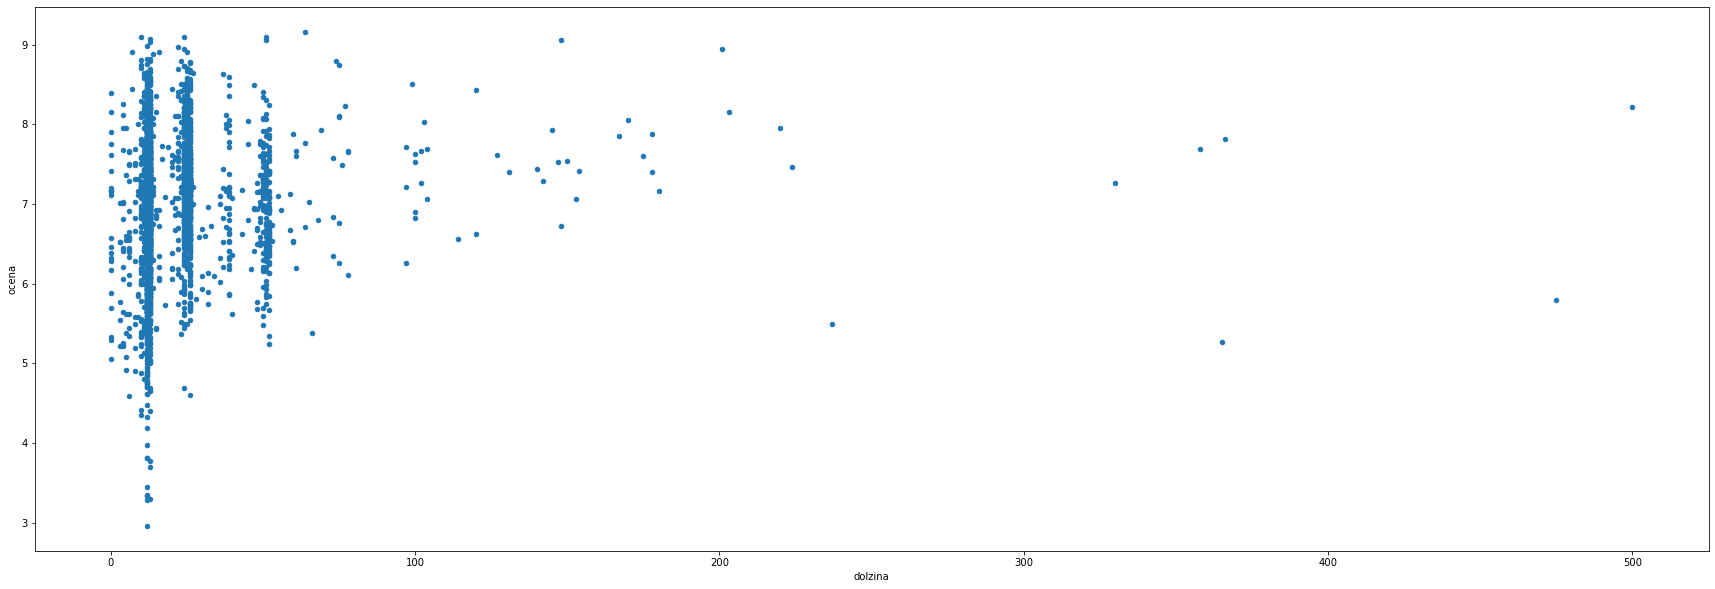

In [3145]:
serije.plot.scatter('dolzina', 'ocena', figsize=(30,10))

<AxesSubplot:xlabel='dolzina', ylabel='stevilo'>

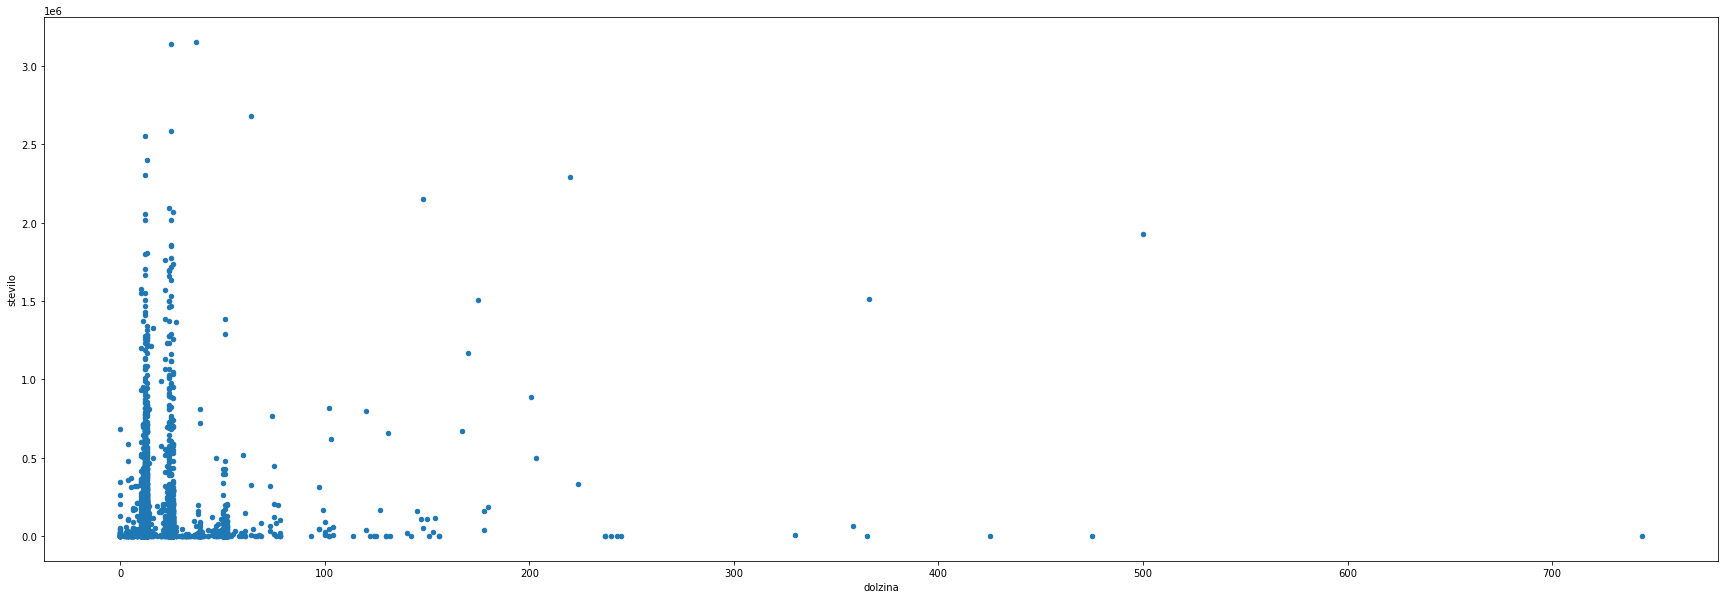

In [3146]:
serije.plot.scatter('dolzina', 'stevilo', figsize=(30,10))

Grafa sta težka za brati, saj je večina serij osredotočena na par mestih, zato se bomo osredotočili tja. Animirane serije načeloma izhajajo tedensko v 3 mesece dolgih kosih, ki jim rečemo sezone (približno se ujemajo z letnimi časi in se po njih tudi imenujejo). Serija ki izhaja eno sezono ima tako približno 13 epizod, serija ki izhaja dve sezoni približno 26 in serija ki izhaja celo leto približno 52. To so te tri kategorije, kamor spada večina serij in ki si jih bomo zdaj ogledali. Kasneje si bomo pa ogledali tudi serije, ki so nadpovprečno dolge.

Najprej si oglejmo kako so serije po številu epizod razporejene znotraj naših kategorij.

<AxesSubplot:xlabel='dolzina'>

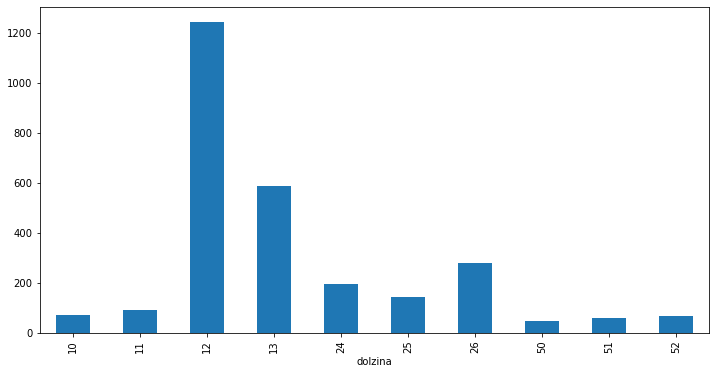

In [3147]:
serije_po_dolzini = serije[((serije.dolzina >= 10) & (serije.dolzina <= 13)) | ((serije.dolzina >= 24) & (serije.dolzina <= 26)) | ((serije.dolzina >= 50) & (serije.dolzina <= 52))].groupby('dolzina')
serije_po_dolzini.size().plot.bar(figsize=(12,6))

Kot vidimo je večina serij dolgih eno sezono, več kot tretina vseh ima 12 epizod. Serij dolgih 2 sezoni je dosti manj, celoletnih pa še manj. Podobno kot pri priredbah pa poglejmo še povprečno število gledalcev in ocen.

<AxesSubplot:xlabel='dolzina'>

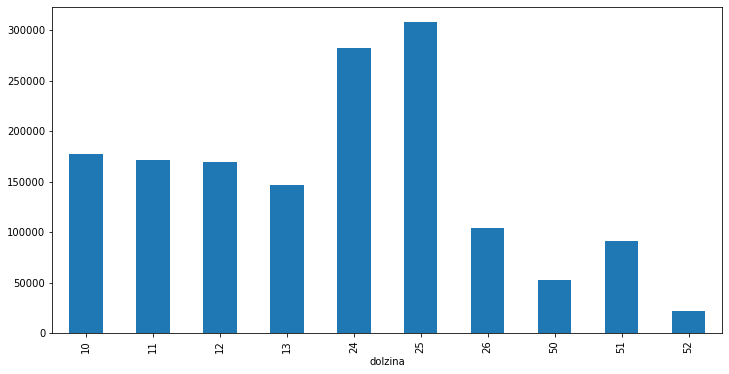

In [3148]:
serije_po_dolzini.stevilo.mean().plot.bar(figsize=(12,6))

In [3149]:
serije_po_dolzini.ocena.mean()

dolzina
10    6.702388
11    7.158875
12    6.781532
13    6.943910
24    7.274734
25    7.443088
26    7.153096
50    7.085610
51    6.966102
52    6.844828
Name: ocena, dtype: float64

Izkaže se, da so najbolj popularne in najvišje ocenjene serije, ki trajajo dve sezoni. Razlika ni zelo velika, vendar pa je opazna, še posebej pri ocenah. Če primerjamo serije dolge eno sezono s tistimi dolgimi dve nam manjkajo podatki, da bi lahko dorekli ali je razlog za uspeh dolžina, ali pa so ravno serije, ki imajo večjo verjetnost uspeha tiste, ki dobijo dve sezoni. V vsakem primeru pa je rezultat, da so serije, ki trajajo dve sezoni najbolj uspešne po obeh metrikah.

Za zanimivost si pa poglejmo še kako je povprečna dolžina odvisna od vira.

<AxesSubplot:xlabel='vir'>

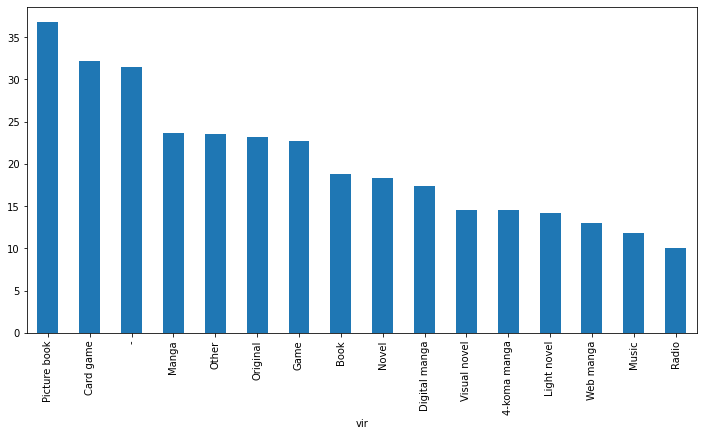

In [3150]:
serije_po_virih.dolzina.mean().sort_values(ascending=False).plot.bar(figsize=(12,6))

Rezultati niso popolnoma pričakovani. Čeprav so priredbe "light novel"-ov povprečno najbolj gledane, so te v povprečju krajše, kar pomeni, da verjetno ne predstavljajo velikega deleža uspeha 2 sezonskih serij. Po drugi strani so priredbe mang, iger in originalna dela v povprečju 2 sezoni dolga. Poglejmo si te štiri primere še bolj natančno, saj so najbolj številčni.

<AxesSubplot:xlabel='dolzina'>

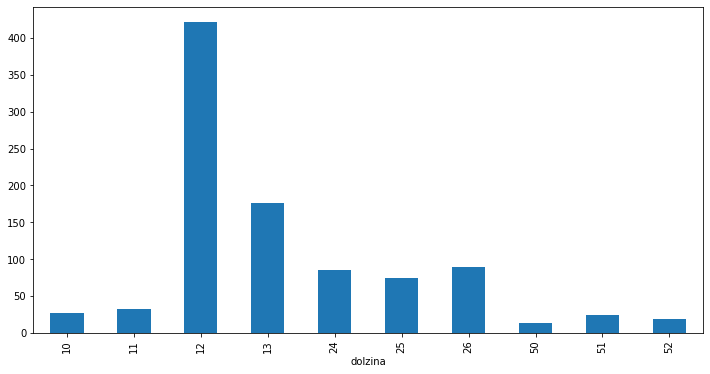

In [3151]:

mange_po_dolzini = serije[(serije.vir == 'Manga') & (((serije.dolzina >= 10) & (serije.dolzina <= 13)) | ((serije.dolzina >= 24) & (serije.dolzina <= 26)) | ((serije.dolzina >= 50) & (serije.dolzina <= 52)))].groupby('dolzina')
mange_po_dolzini.size().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='dolzina'>

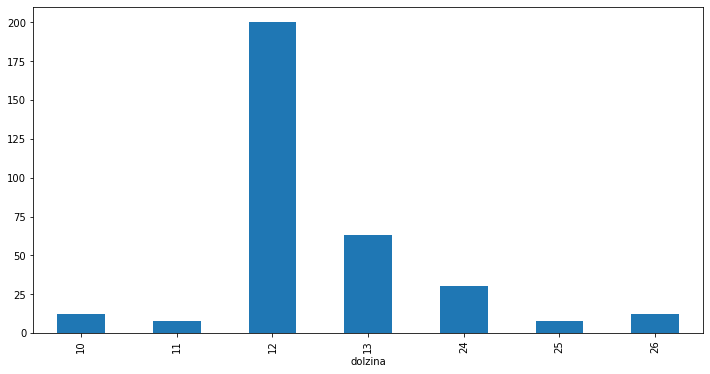

In [3152]:
ln_po_dolzini = serije[(serije.vir == 'Light novel') & (((serije.dolzina >= 10) & (serije.dolzina <= 13)) | ((serije.dolzina >= 24) & (serije.dolzina <= 26)) | ((serije.dolzina >= 50) & (serije.dolzina <= 52)))].groupby('dolzina')
ln_po_dolzini.size().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='dolzina'>

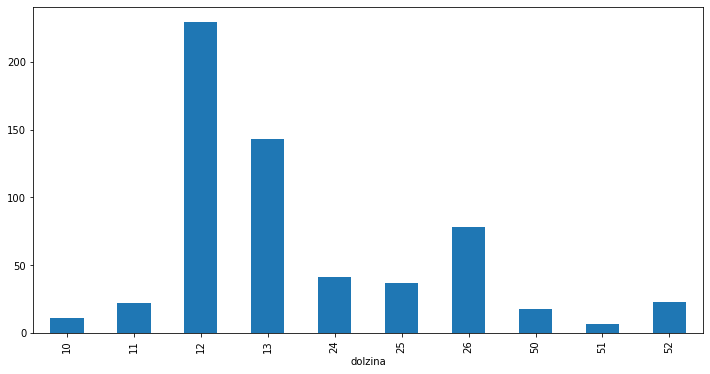

In [3153]:
original_po_dolzini = serije[(serije.vir == 'Original') & (((serije.dolzina >= 10) & (serije.dolzina <= 13)) | ((serije.dolzina >= 24) & (serije.dolzina <= 26)) | ((serije.dolzina >= 50) & (serije.dolzina <= 52)))].groupby('dolzina')
original_po_dolzini.size().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='dolzina'>

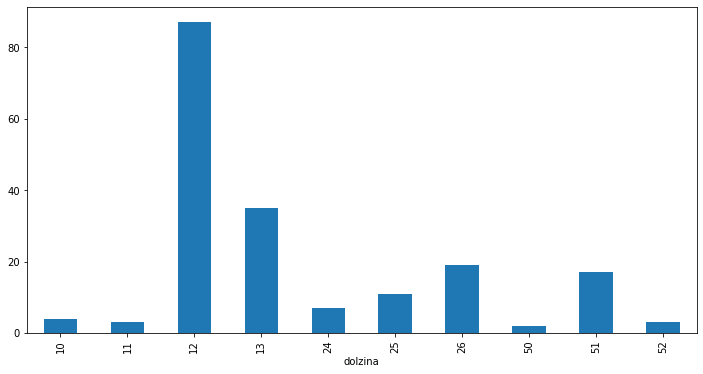

In [3154]:
game_po_dolzini = serije[(serije.vir == 'Game') & (((serije.dolzina >= 10) & (serije.dolzina <= 13)) | ((serije.dolzina >= 24) & (serije.dolzina <= 26)) | ((serije.dolzina >= 50) & (serije.dolzina <= 52)))].groupby('dolzina')
game_po_dolzini.size().plot.bar(figsize=(12,6))

Opazimo, da je pri vseh štirih virih daleč največ serij dolgih 1 sezono, vendar so priredbe mang in originalne serije najbolj pogosto dolge 2 sezoni, medtem ko so priredbe "light novel"-ov bolj redko daljše od ene sezone in nikoli ne trajajo celo leto. Priredbe mang predstavljajo torej največji delež dvo sezonskih serij, za njimi pa originalne serije, ki imajo povprečno nižje ocene in dosti manj gledalcev od drugih dveh. Izstopajo tudi priredbe iger, saj jih je razmeroma veliko dolgih celo leto.

Edina razloga, ki se ju spomnim, ki razložita, da je tako malo priredb "light novel"-ov dolgih dve sezoni v primerjavi s priredbami mang je, da so mange načeloma dosti bolj popularne na japonskem, ter so veliko bolj pogosto namenjene otrokom in izkaže se, da otroci radi gledajo risanke. Ta razlaga s popularnostjo pri otrocih bi tudi razložila zakaj je več originalnih del dolgih dve sezone in zakaj imajo priredbe iger s kartami razmeroma več celoletnih serij.

Zdaj pa si poglejmo še 30 najdaljših serij.

In [3155]:
serije.sort_values(by = 'dolzina', ascending = False).head(30)

,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena
id,,,,,,,,
33044,Asa Da yo! Kaishain,DLE,4,744,Original,TV,663,NaN
1735,Naruto: Shippuuden,Studio Pierrot,"1,2,4,17,31,27",500,Manga,TV,1927222,8.22
31517,Ohayou Ninja-tai Gatchaman,-,"4,20",475,-,TV,648,5.80
10797,Kayoe! Chuugaku,DLE,"4,23",425,Original,TV,423,NaN
269,Bleach,Studio Pierrot,"1,2,4,37,31,27",366,Manga,TV,1511350,7.82
6131,Charady no Joke na Mainichi,-,4,365,Original,TV,2334,5.27
516,Keroro Gunsou,Sunrise,"4,24,18,20,27",358,Manga,TV,66117,7.69
3006,Atashin&#039;chi,Shin-Ei Animation,"4,36",330,Manga,TV,4116,7.27
48904,Digital Tokoro-san,Polygon Pictures,4,245,Original,TV,60,NaN


Hitro opazimo, da so skoraj vse zelo dolge serije priredbe mang, kar ima smisel saj najuspešnejše mange izhajajo ven tudi po desetletja. Tukaj se tudi vrnemo k naši predpostavki o dolžini epizod. Skoraj vse serije na zgornjem seznamu, ki niso priredbe mang, imajo kratke epizode, včasih tudi pod minuto dolge. Druga stvar ki ni očitna iz seznama če ne poznamo zapisanih serij pa je, da je velik del najdaljših serij namenjen otrokom.

### Analiza žanrov

V naši podatkovni bazi so serije označene s približno 40 žanri. Kot prej si bomo najprej pogledali, kateri žanri so najbolj pogosti.

<AxesSubplot:xlabel='zanr'>

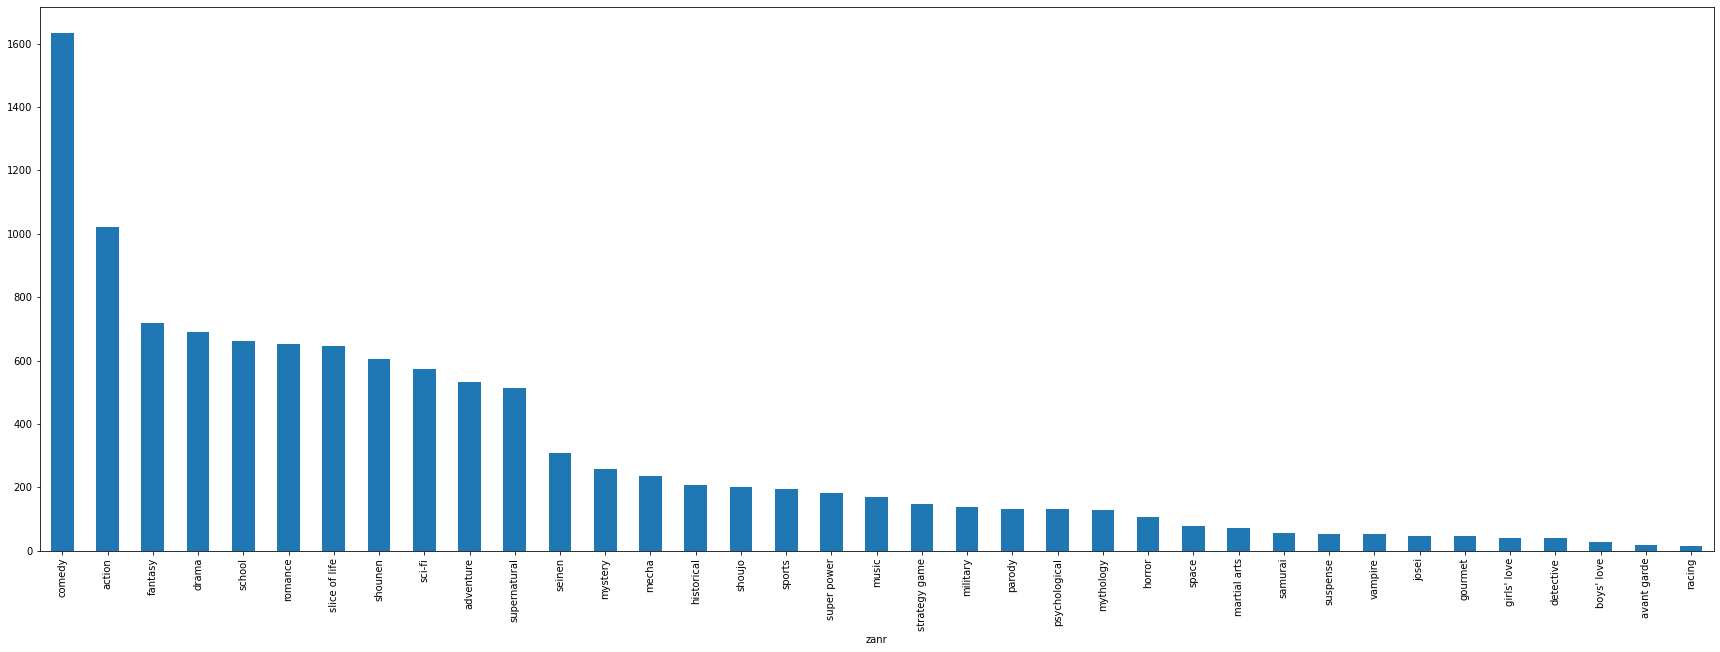

In [3156]:
merge_zanri = pd.merge(zanri, serije, left_index=True, right_index=True)
serije_po_zanrih = merge_zanri.groupby('zanr')
serije_po_zanrih.size().sort_values(ascending=False).plot.bar(figsize=(30,10))

Vidimo da so v animiranih serijah najbolj pogoste komedije, za njimi pa action, fantasy, drama, school in romance. Vzamimo si trenutek, da pokomentiramo rezultate. Prvič, med žanri se pojavijo štirje, ki so japonskega izvora. To so shounen, shoujo, seinen, josei. Te štiri oznake v bistvu niso zares žanri ampak oznake za ciljne skupine del. Shounen tako pomeni, da je nekaj namenjeno najstnikom in mlajšim fantom, seinen pa starejšim, in podobno shoujo za najstnice, josei pa za starejše ženske. Naša baza podatkov tukaj ni zelo konsistentna pri označevanju. Slice of life se tudi najpogosteje uporablja v opisu animirinah serij, opisuje pa dela, ki kažejo vsakdanje življenje. Še dve opombi glede žanra komedije in zakaj tako izstopa, izkaže se da baza podatkov, ki jo uporabljamo zelo liberalno podarja naslov komedije in je zato marsikatera serija, ki ima le bežne elemente komedije označena s tem žanrom, takšnih serij pa je zelo veliko saj je večina animiranih serij v glavnem namenjena otrokom in najstnikom in imajo zato pogosto komedične elemente. To je tudi razlog, zakaj so ostali žanri kot action in school tako visoko.

Poglejmo si zdaj še kakšne so povprečne ocene posameznih žanrov.

In [3157]:
serije_po_zanrih.ocena.mean().sort_values(ascending=False)

zanr
suspense         7.576792
psychological    7.400379
mythology        7.311190
mystery          7.292734
drama            7.279190
                   ...   
mecha            6.815848
horror           6.789902
gourmet          6.785333
strategy game    6.758750
avant garde      6.733529
Name: ocena, Length: 37, dtype: float64

Razlike med ocenami niso zelo velike, manj kot ena točka loči najvišje in najnižje povprečje.

Suspense in psychological najbolj izstopata, je pa obeh razmeroma malo. To sta dva izmed žanrov, ki sta najmanj primerna za mlajše gledalce, kar bi znalo razložiti zakaj imata razmeroma manj serij in zakaj so te višje ocenjenje, saj so namenjene (teoretično) bolj kritični publiki. Podobno velja v manjši meri tudi za drama in mystery, žanr mythology pa je podan katerikoli seriji, ki ima še tako minimalne mitološke elemente, torej ne bi znal razložiti razloga za visoke ocene. Tukaj bi bilo zanimivo pogledati ali je to trend, ki velja tudi za ostale medije, ali pa je specifičen na japonske animirane serije.

Razlogi za nizko oceno avant garde so očitni, za strategy game bi znal biti razlog za nizke ocene da je to žanr, ki pripada skoraj vsem priredbam iger s kartami, gourmet pa je podobno kot mythology prilepljen na vse serije, ki imajo kakršenkoli element kuhanja, torej izgleda da se je izšlo da so to ravno slabše ocenjenje serije. Presenetljivo je, da se uspeh japonskih grozljivk iz filmov ni prenesel na animacijo. Mecha (žanr kjer nastopajo veliki roboti, ki jih pilotirajo ljudje) je tudi zanimiva zgodba saj je še en žanr, ki je specifičen za ta medij in ima dolgo zgodovino, ki pa je poznam dobro in se ne bom spuščal v razloge zakaj v zadnjih 20 letih zgleda da ni najbolje sprejet.

Poglejmo še kateri serije s katerimi žanri imajo največ povprečnih gledalcev.

<AxesSubplot:xlabel='zanr'>

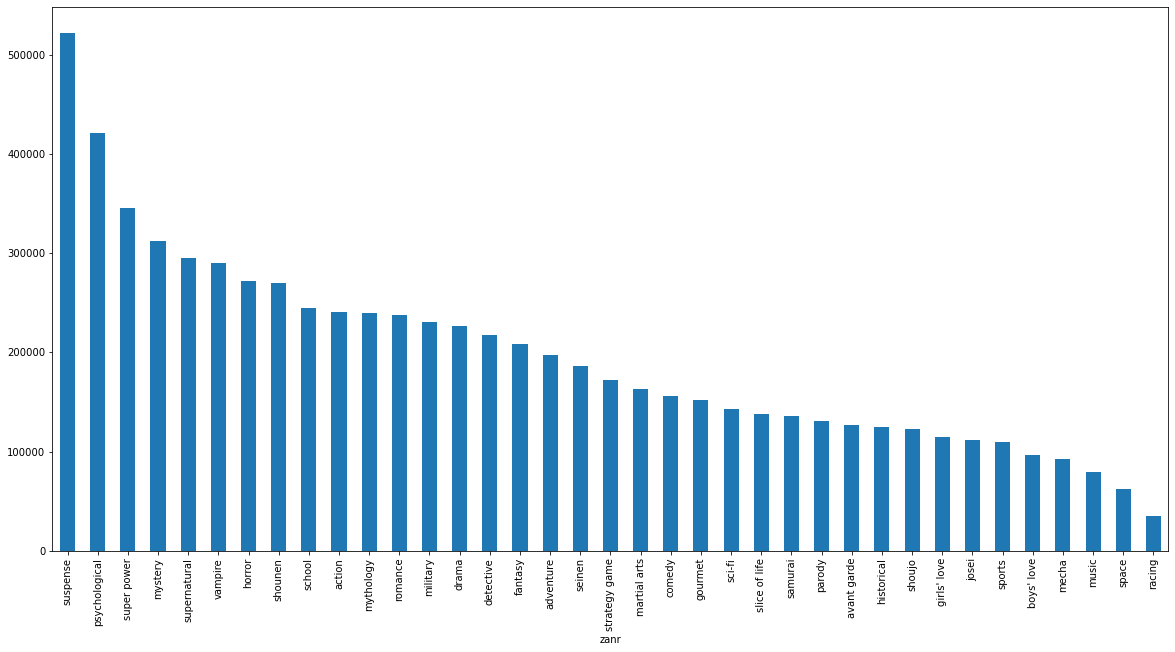

In [3158]:
serije_po_zanrih.stevilo.mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

Pri teh rezultatih ni nobenega velikega presenečenja. Suspense in psychological sta spet na vrhu, edina stvar ki bi znala biti presenetljiva je, da ima horror tako veliko ogledov, ampak če upoštevamo da je horror podobno označen kot komedije zgoraj, je to smiselno.

Ker me zanima poglejmo še kako dolge so serije glede na njihove žanre.

<AxesSubplot:xlabel='zanr'>

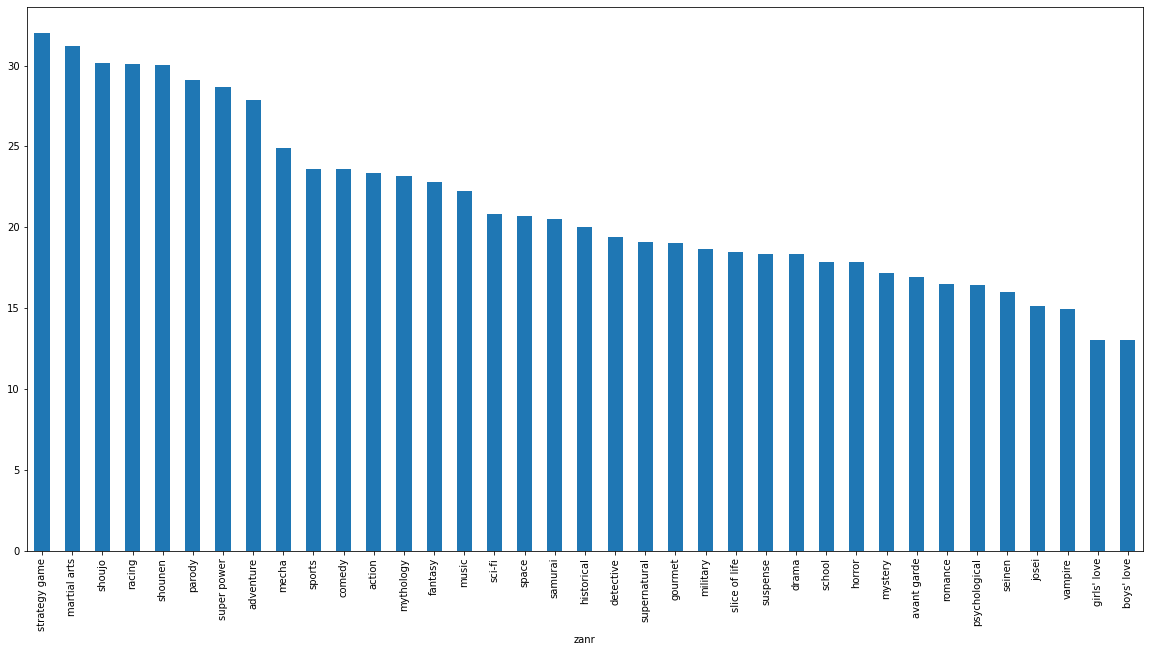

In [3159]:
serije_po_zanrih.dolzina.mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

Vsi top rezultati ustrezajo serijam namenjenim otrokom, medtem ko velja za najkrajše ravno obratno. To je tudi v prid hipotezi, ki smo jo zgoraj imeli, zakaj so priredbe mang povprečno daljše od ostalih popularnih priredb.

Ugotovili smo torej, da sta najbolj popularna in visoko ocenjena žanra suspense in psychological, najmanj pa avant garde, zdaj si bomo pa pogledali še posamezne studije.

### Analiza po studijih

Cilj pri analizi studijev je, da vidimo kaj združuje najbolj uspešne studije in v čem se razlikujejo. Preko tega bomo boljše razumeli kateri studijo si moramo izbrati za našo idealno serijo, kar je razlog za to analizo, poleg mojega intrinzičnega interesa.

Ker iz raznih ekonomskih razlogov obstaja, oziroma je obstajalo, zelo veliko različnih studijev, se bomo omejili na tiste, ki so v zadnje 20 letih naredili vsaj 25 animiranih serij. Velikost in sposobnosti studijev se med seboj močno razlikujejo, torej za začetek poglejmo kateri studiji so bili najbolj pridni. Seznam nam pove koliko serij so izdali od leta 2000 naprej, prvi graf nam pove koliko gledalcev so dobili skupaj prek vseh serij, drugi pa koliko jih dobijo njihove serije v povprečju.

In [3160]:
serije_po_studijih = serije.groupby('studio').filter(lambda x: len(x) >= 25).groupby('studio')
serije_po_studijih.size().sort_values(ascending=False).head(50)

studio
-                       179
J.C.Staff               135
Studio Deen             122
Madhouse                119
A-1 Pictures             94
Sunrise                  86
Toei Animation           85
TMS Entertainment        76
Gonzo                    67
Production I.G           63
DLE                      61
Bones                    59
OLM                      55
Studio Pierrot           52
Doga Kobo                51
SILVER LINK.             48
Shaft                    47
Xebec                    46
Brain&#039;s Base        45
Satelight                43
feel.                    37
LIDENFILMS               35
MAPPA                    35
Diomedéa                 31
Zexcs                    30
Lerche                   28
Kachidoki Studio         27
Tatsunoko Production     27
Kyoto Animation          26
P.A. Works               26
Studio Comet             26
8bit                     25
dtype: int64

<AxesSubplot:xlabel='studio'>

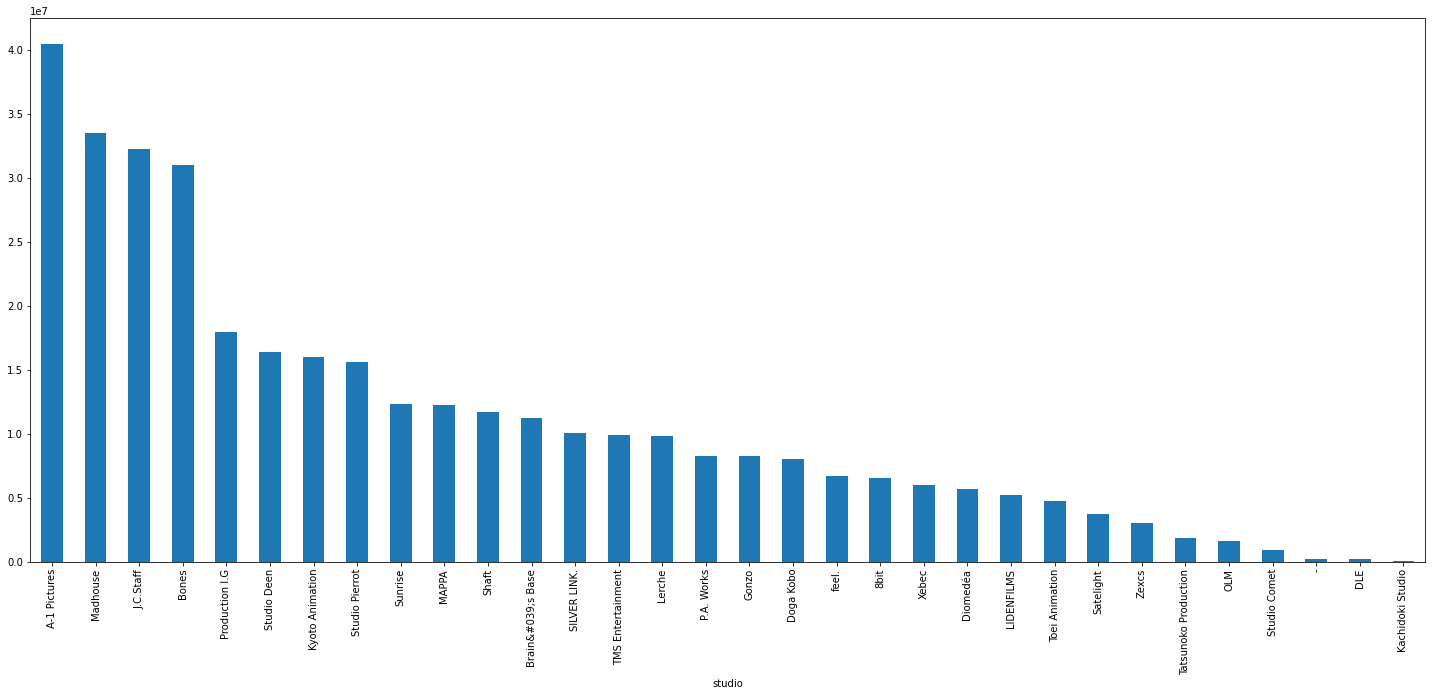

In [3161]:
serije_po_studijih.stevilo.sum().sort_values(ascending=False).plot.bar(figsize=(25,10))

<AxesSubplot:xlabel='studio'>

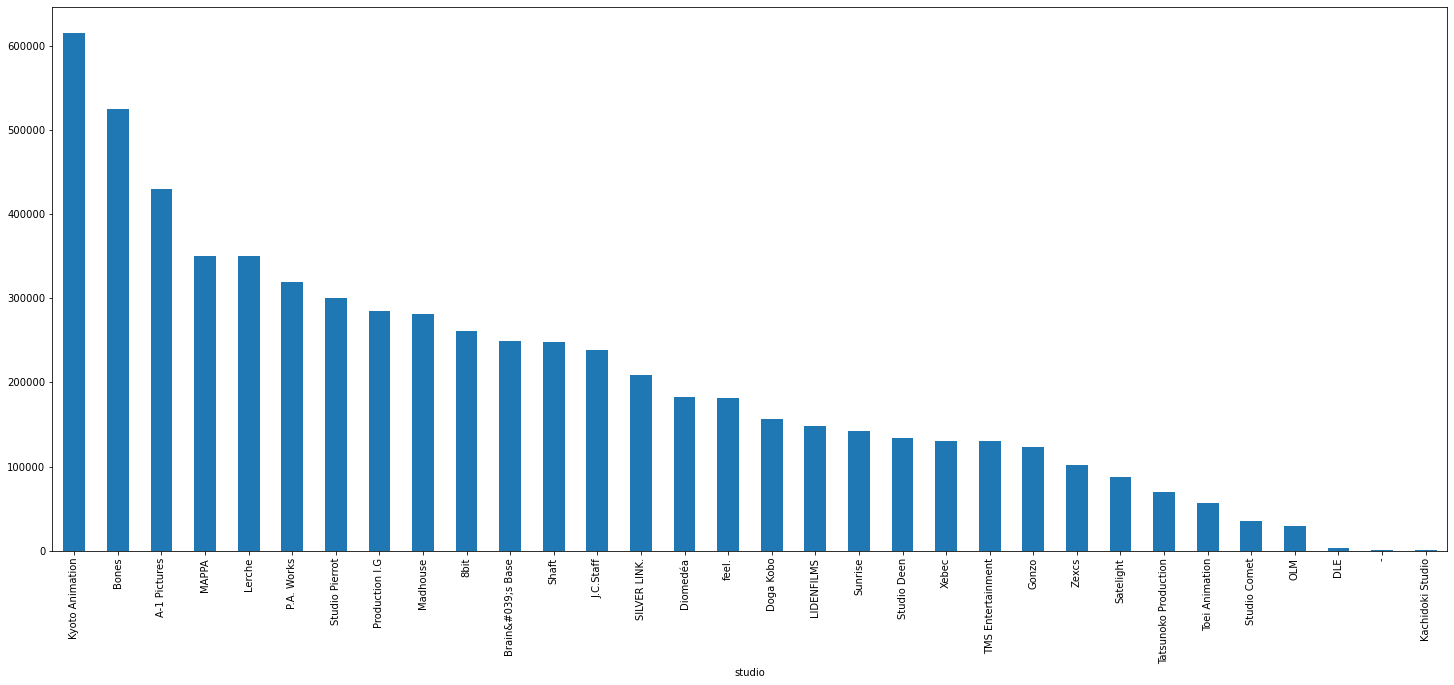

In [3162]:
serije_po_studijih.stevilo.mean().sort_values(ascending=False).plot.bar(figsize=(25,10))

Vidimo lahko da so trije studiji z največ povprečnimi gledalci izdali zelo različno število serij. Poglejmo še kako so povprečno ocenjeni.

In [3163]:
serije_po_studijih.ocena.mean().sort_values(ascending=False)

studio
Kyoto Animation         7.868846
Production I.G          7.603226
Bones                   7.584576
Shaft                   7.501277
Madhouse                7.417983
A-1 Pictures            7.366559
MAPPA                   7.341429
Lerche                  7.340357
Sunrise                 7.272791
P.A. Works              7.245385
Studio Pierrot          7.244231
J.C.Staff               7.220522
8bit                    7.215200
Brain&#039;s Base       7.210222
Toei Animation          7.087407
TMS Entertainment       7.086757
Doga Kobo               7.056875
Studio Deen             7.002167
Xebec                   7.001739
Studio Comet            6.971538
SILVER LINK.            6.965833
Satelight               6.957907
Gonzo                   6.922537
feel.                   6.902703
Diomedéa                6.873226
LIDENFILMS              6.798286
Zexcs                   6.730333
Tatsunoko Production    6.691667
OLM                     6.662642
DLE                     5.993333
-  

V teh tabelah in grafih izstopajo štirje studiji: Kyoto animation, Bones, Production I.G in A-1 Pictures. Pogledali si bomo najboljši preprost indikator razlik med studiji, ki nam je na voljo, koliko serij različnih žanrov so izdali.

<AxesSubplot:xlabel='zanr'>

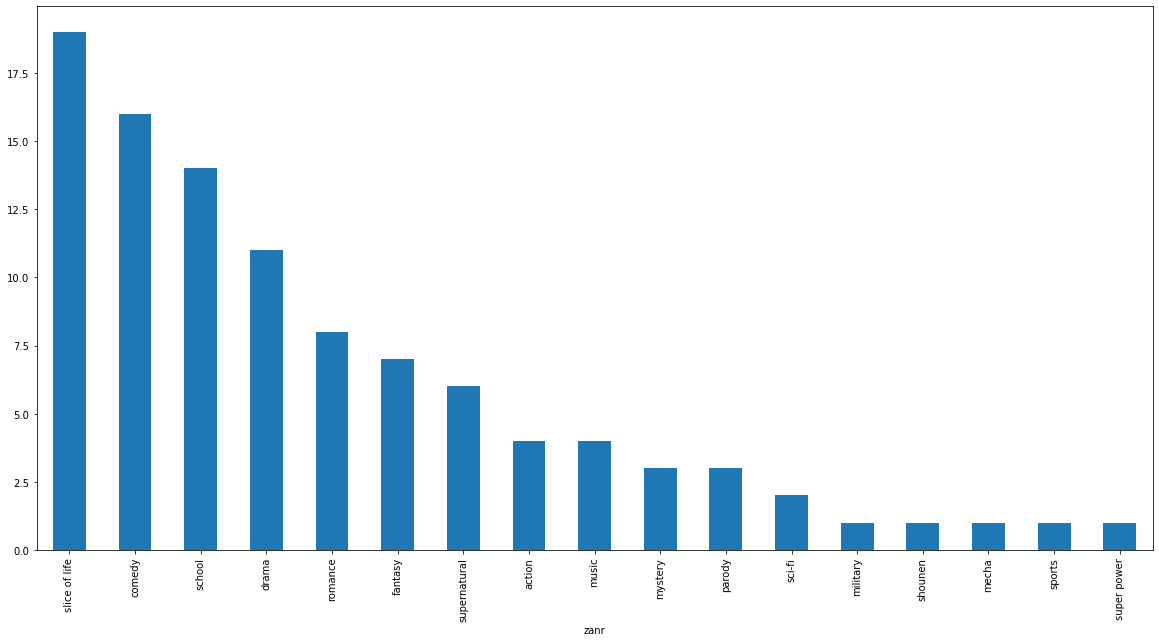

In [3164]:
merge_zanri[merge_zanri.studio == 'Kyoto Animation'].groupby('zanr').size().sort_values(ascending=False).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='zanr'>

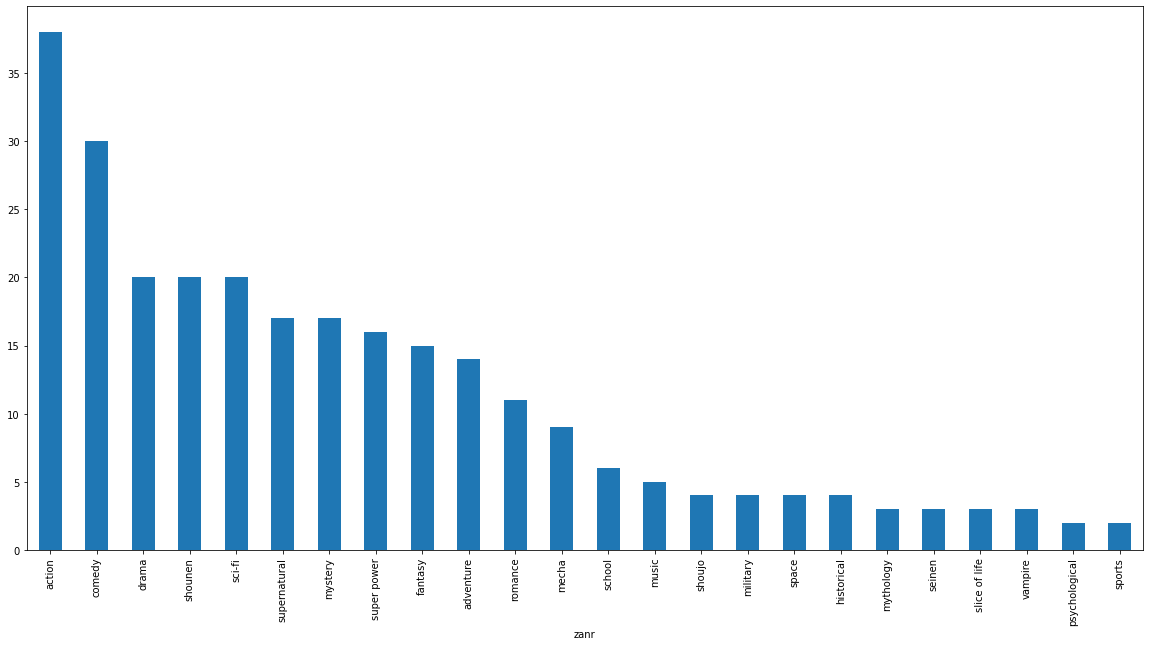

In [3165]:
merge_zanri[merge_zanri.studio == 'Bones'].groupby('zanr').size().sort_values(ascending=False).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='zanr'>

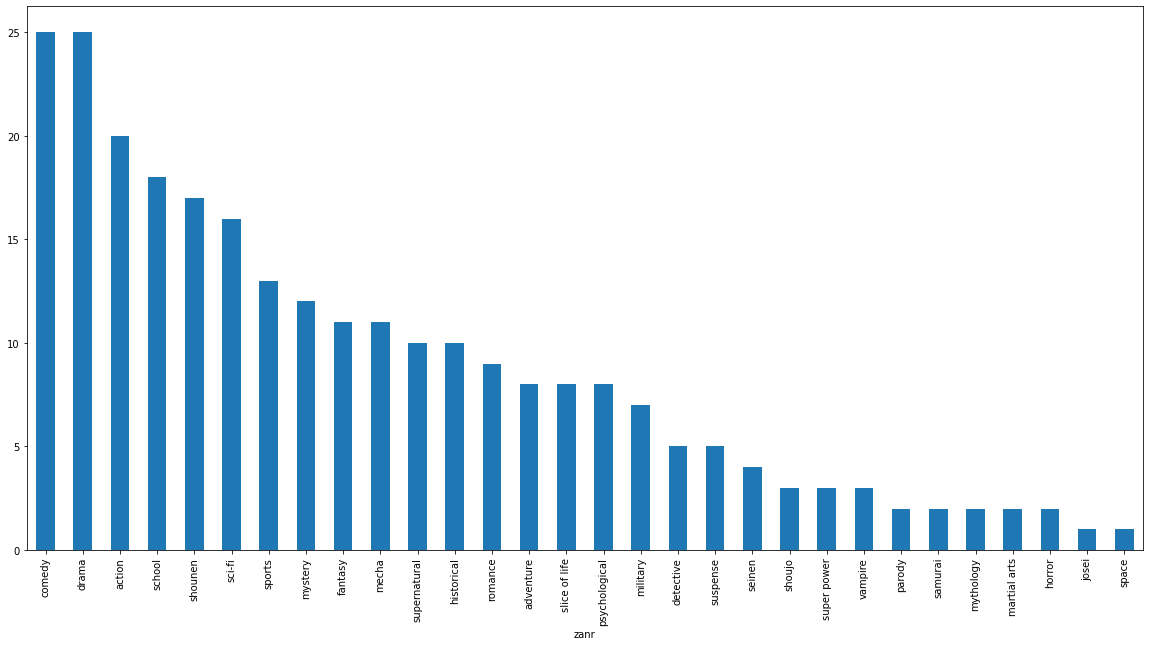

In [3166]:
merge_zanri[merge_zanri.studio == 'Production I.G'].groupby('zanr').size().sort_values(ascending=False).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='zanr'>

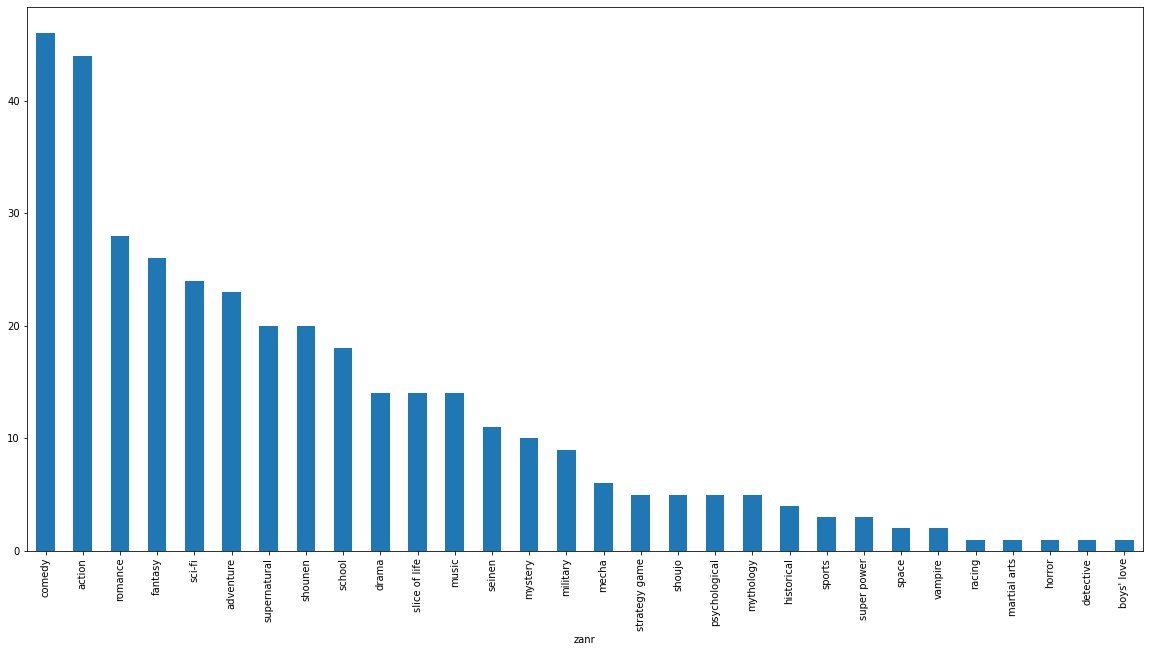

In [3167]:
merge_zanri[merge_zanri.studio == 'A-1 Pictures'].groupby('zanr').size().sort_values(ascending=False).plot.bar(figsize=(20,10))

Med najpogostejšimi žanri je comedy pri vseh, Bones in Production I.G delata veliko dram, A-1 pa romantičnih serij, te trije pa so naredili tudi veliko akcijskih serij. Kyoto animation tukaj najbolj izstopa, saj je največ njihovih serij žanra slice of life, ki ni ne med najbolj gledanimi, ne med najbolj ocenjenimi, torej izgleda da je Kyoto Animation najbolj specializiran za določeno vrsto serij. Če želimo pa narediti idealno serijo po zgornji analizi žanrov pa raje vzamemo studio Production I.G.

Tako je naša idealna serija dolga 2 sezoni, ima žanra suspense in/ali psychological in studio, naj je priredba mange ali "Light novel"-a, ki jo naj naredi je Production I.G. Taka serija žal ne obstaja, če pa sprostimo pogoj na priredbi pa dobimo en rezultat, Psycho-pass, ki je ena izmed najbolj popularnih in visoko ocenjenih serij v bazi podatkov.

In [3168]:
merge_zanri[(merge_zanri.zanr == "suspense") & (merge_zanri.studio == "Production I.G") & (merge_zanri.dolzina >= 20)]

,zanr,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena
id,,,,,,,,,
13601,suspense,Psycho-Pass,Production I.G,"1,24,41,39,40",22,Original,TV,1382803,8.36


Alternativno si lahko pogledamo kateri kombo žanra in studija nam da najboljše serije.

In [3169]:
zanri_studiji = merge_zanri.groupby(['zanr', 'studio']).filter(lambda x: len(x) >= 10).groupby(['zanr', 'studio'])
zanri_studiji.ocena.mean().sort_values(ascending=False).head(30)

zanr           studio           
mystery        Shaft                8.189000
strategy game  Madhouse             8.134545
suspense       Madhouse             8.115000
action         Wit Studio           8.110909
sports         Production I.G       8.106154
               Madhouse             8.075385
seinen         A-1 Pictures         8.051818
shounen        Production I.G       8.034706
drama          Kyoto Animation      7.965455
school         Production I.G       7.907222
               Kyoto Animation      7.905000
slice of life  Kyoto Animation      7.899474
comedy         Kyoto Animation      7.864375
shounen        David Production     7.847500
slice of life  Brain&#039;s Base    7.845833
comedy         Production I.G       7.814167
slice of life  A-1 Pictures         7.808571
drama          Production I.G       7.782400
action         David Production     7.763333
shoujo         TMS Entertainment    7.762727
psychological  Madhouse             7.745455
comedy         Bones  

Če gledamo povprečno oceno kot metriko dobimo žanr mystery, ki je tudi med bolj popularnimi, ter pa studio Shaft. Z upoštevanjem ostalih pogojev dobimo eno serijo, ki pa zgleda da je druga sezona, torej je žal ne moremo priporočiti.

In [3170]:
merge_zanri[(merge_zanri.zanr == "mystery") & (merge_zanri.studio == "Shaft") & (merge_zanri.dolzina >= 20) & ((merge_zanri.vir == 'Manga') | (merge_zanri.vir == 'Light novel'))]

,zanr,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena
id,,,,,,,,,
17074,mystery,Monogatari Series: Second Season,Shaft,"4,7,22,37,32",26,Light novel,TV,577196,8.78


In [3171]:
zanri_studiji.stevilo.mean().sort_values(ascending=False).head(30)

zanr           studio          
action         Wit Studio          1.149472e+06
shounen        Bones               9.444748e+05
comedy         Bones               8.047110e+05
super power    Bones               7.925104e+05
fantasy        White Fox           7.861059e+05
               A-1 Pictures        7.630089e+05
slice of life  Kyoto Animation     7.480837e+05
shounen        A-1 Pictures        7.080684e+05
adventure      A-1 Pictures        6.959347e+05
comedy         Kyoto Animation     6.916966e+05
action         Bones               6.875854e+05
suspense       Madhouse            6.806870e+05
strategy game  Madhouse            6.690593e+05
school         Kyoto Animation     6.528804e+05
supernatural   A-1 Pictures        6.520161e+05
drama          Kyoto Animation     6.467848e+05
supernatural   Bones               6.433917e+05
action         ufotable            6.274263e+05
shounen        David Production    6.077171e+05
romance        A-1 Pictures        6.060319e+05
adventur

Po metriki števila gledalcev dobimo akcijsko serijo, ki jo je naredil Wit Studio. Če upoštevamo dolžino dveh sezon in pogoj priredbe najdemo kar dve ustrezni seriji, vključno s trenutno najbolj popularno serijo v bazi podatkov, Attack on titan.

In [3172]:
merge_zanri[(merge_zanri.zanr == "action") & (merge_zanri.studio == "Wit Studio") & (merge_zanri.dolzina >= 20) & (merge_zanri.vir == 'Manga')]

,zanr,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena
id,,,,,,,,,
16498,action,Shingeki no Kyojin,Wit Studio,"1,8,10,7,38,31,27",25,Manga,TV,3142121,8.52
37521,action,Vinland Saga,Wit Studio,"1,2,8,13,42",24,Manga,TV,938669,8.73


To zaključi produktivni del analize.

### Analiza naslovov

Za zabavo bi preveril še, ali je kaj resnice za eno izmed najbolj pogostih šal med navdušenci animiranih serij, in sicer ali imajo priredbe "Light novel"-ov res predolge naslove. Primerjajmo torej dolžine naslovov.

In [3173]:
dolzine_naslovov = serije.copy()
dolzine_naslovov['naslov_len'] = dolzine_naslovov['naslov'].apply(lambda x: len(x))
dolzine_naslovov['naslov_len'].mean()

21.865479115479115

In [3174]:
dolzine_naslovov_po_virih = dolzine_naslovov.groupby('vir')
dolzine_naslovov_po_virih.naslov_len.mean().sort_values(ascending=False)

vir
Radio            37.000000
Light novel      27.866856
Music            26.636364
Game             25.769585
Card game        25.511628
Book             24.666667
-                23.085227
Digital manga    22.571429
Novel            21.835443
Visual novel     21.766234
Web manga        21.724138
Other            20.981308
4-koma manga     20.809160
Original         20.534823
Manga            19.924751
Picture book     17.083333
Name: naslov_len, dtype: float64

Izkaže se, da imajo priredbe "Light novel"-ov res dolge naslove glede na povprečje. Poglejmo še razporeditev dolžin naslovov.

<AxesSubplot:xlabel='naslov_len'>

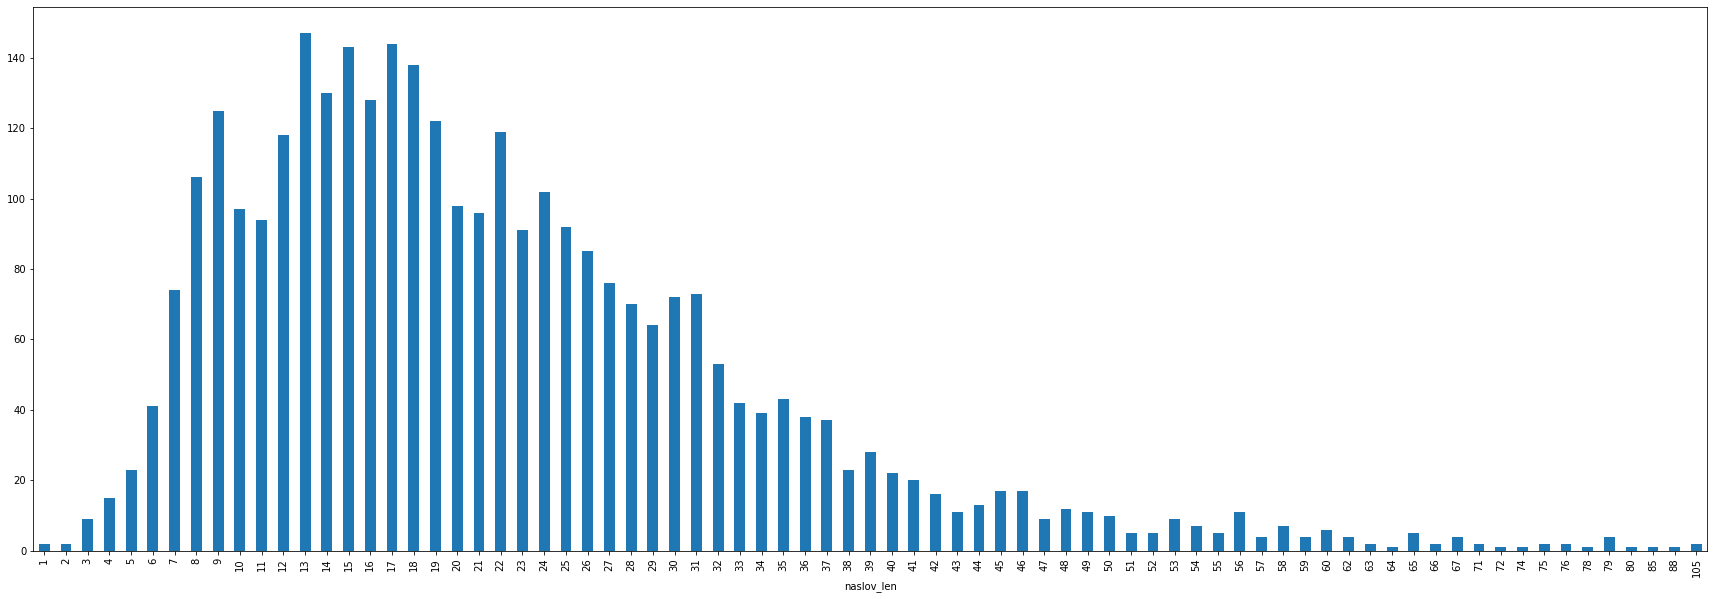

In [3175]:
dolzine_naslovov.groupby('naslov_len').size().plot.bar(figsize=(30,10))

Kot vidimo imajo nekatere serije res komično dolga imena, v esktremu kar petkrat daljša od povprečja (obstajata tudi dve seriji, ki imata le eno črko dolgo ime, torej ima serija z najdaljšim imenom 105x dolžino imena najkrajše). Poglejmo si kakšne so serije z najdaljšimi imeni.

In [3176]:
dolzine_naslovov[dolzine_naslovov.naslov_len == 1]

,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena,naslov_len
id,,,,,,,,,
156,X,Madhouse,"1,8,10,22,31,25",24,Manga,TV,73782,7.42,1
14467,K,GoHands,"1,7,37,31",13,Original,TV,669287,7.46,1


In [3177]:
dolzine_naslovov[dolzine_naslovov.naslov_len >= 65].sort_values('naslov_len', ascending=False)

,naslov,studio,zanri,dolzina,vir,tip,stevilo,ocena,naslov_len
id,,,,,,,,,
44037,Shin no Nakama ja Nai to Yuusha no Party wo Oi...,Studio Flad,"2,10,22,36",13,Light novel,TV,114631,7.15,105
40496,Maou Gakuin no Futekigousha: Shijou Saikyou no...,SILVER LINK.,"1,10,6,23",13,Light novel,TV,508846,7.36,105
40594,Tatoeba Last Dungeon Mae no Mura no Shounen ga...,LIDENFILMS,"2,10",12,Light novel,TV,193028,6.34,88
40815,Honzuki no Gekokujou: Shisho ni Naru Tame ni w...,Ajia-Do,"10,36",12,Light novel,TV,129428,8.14,85
42282,Otome Game no Hametsu Flag shika Nai Akuyaku R...,SILVER LINK.,"4,8,10,22,35,23,25",12,Light novel,TV,154920,7.27,80
32887,Dungeon ni Deai wo Motomeru no wa Machigatteir...,J.C.Staff,"1,2,10",12,Light novel,TV,365740,7.05,79
41530,Magia Record: Mahou Shoujo Madoka☆Magica Gaide...,Shaft,"8,41,40",8,Game,TV,42725,7.03,79
38573,Tsuujou Kougeki ga Zentai Kougeki de Ni-kai Ko...,J.C.Staff,"2,4,10",12,Light novel,TV,219525,5.55,79
39324,"Uchi no Ko no Tame naraba, Ore wa Moshikashita...",Maho Film,"10,36",12,Light novel,TV,162731,7.08,79


Kot se izkaže imajo "Light novel"-i zares predolga imena.